In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize'] = (15,7)
from datetime import timedelta, datetime


In [2]:
data=pd.read_csv(r"D:\marlabs\Datasets\athlets.csv")#olympic athlets data
data1=pd.read_csv("D:\marlabs\Datasets\noc.csv")#countries data with codes


In [3]:
data1.shape

(230, 3)

In [4]:
data1.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [5]:
#merging the two files
athlets_df=pd.merge(data,data1,on='NOC',how='outer')

In [6]:
athlets_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [7]:
athlets_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [8]:
#Number of countries participated
len(athlets_df.region.unique())

207

#Define a set of Questions
1. Top 5 countries in winning medals
2. Top 5 Countries in winning Gold medals
3. Top 10 athletes with most number of medals
4. top 10 athletes wiith most number of gold medals
5. country with highest number of host
6.Female vs Male


Data Cleaning process

In [9]:
#removing unwanted columns here it is Notes-column
data=athlets_df.drop('notes',axis=1)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [10]:
data.shape

(271117, 16)

In [11]:
#  dropping the duplicates from the dataset.
print(data.shape)
data = data.drop_duplicates(keep='first')
print(data.shape)

(271117, 16)
(269732, 16)


In [12]:
# dropping all the rows with nan in the columns mentioned above in the list.i.e removing athlete details with no medals
data.dropna(subset=['Medal'], inplace=True)




In [13]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
8,3610.0,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998.0,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China
10,3610.0,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998.0,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,China
11,3610.0,An Yulong,M,23.0,173.0,70.0,China,CHN,2002 Winter,2002.0,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,China
12,3611.0,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996.0,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China
17,6381.0,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984.0,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,China


In [14]:
#sort the Data by Year
data=data.sort_values(by=['Year'])
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
100673,126142.0,Sotirios Versis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896.0,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",Bronze,Greece
54024,35708.0,Marie Lon Flameng,M,18.0,NaN,NaN,France,FRA,1896 Summer,1896.0,Summer,Athina,Cycling,Cycling Men's 100 kilometres,Gold,France
15956,12068.0,Arthur Charles Blake,M,24.0,NaN,NaN,United States,USA,1896 Summer,1896.0,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver,USA
207104,40851.0,Charles Henry Stuart Gmelin,M,23.0,NaN,NaN,Great Britain,GBR,1896 Summer,1896.0,Summer,Athina,Athletics,Athletics Men's 400 metres,Bronze,UK
99931,97712.0,"Leonidas ""Leon"" Pyrgos",M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896.0,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Gold,Greece


In [15]:
data['Year']=data['Year'].astype(int)

In [16]:
data['ID']=data['ID'].astype(int)

In [17]:
data.fillna(0,inplace=True)

In [18]:
#Removing Nan values and replacing with Zeroes and converting datatype to int32
data['Age']=data['Age'].astype(int)
data['Height']=data['Height'].astype(int)
data['Weight']=data['Weight'].astype(int)

#a1.fillna(0,inplace=True)

In [19]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [20]:
data.dtypes

ID         int32
Name      object
Sex       object
Age        int32
Height     int32
Weight     int32
Team      object
NOC       object
Games     object
Year       int32
Season    object
City      object
Sport     object
Event     object
Medal     object
region    object
dtype: object

In [21]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
100673,126142,Sotirios Versis,M,0,0,0,Greece,GRE,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",Bronze,Greece
54024,35708,Marie Lon Flameng,M,18,0,0,France,FRA,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,Gold,France
15956,12068,Arthur Charles Blake,M,24,0,0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver,USA
207104,40851,Charles Henry Stuart Gmelin,M,23,0,0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,Bronze,UK
99931,97712,"Leonidas ""Leon"" Pyrgos",M,0,0,0,Greece,GRE,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Gold,Greece


In [22]:
#drop the index


In [23]:
#data.insert(0, 'Athlet_id', range(1, 1 + len(data)))


In [24]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
100673,126142,Sotirios Versis,M,0,0,0,Greece,GRE,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",Bronze,Greece
54024,35708,Marie Lon Flameng,M,18,0,0,France,FRA,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,Gold,France
15956,12068,Arthur Charles Blake,M,24,0,0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver,USA
207104,40851,Charles Henry Stuart Gmelin,M,23,0,0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,Bronze,UK
99931,97712,"Leonidas ""Leon"" Pyrgos",M,0,0,0,Greece,GRE,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Gold,Greece


In [25]:
#data=data.drop(['ID'],axis=1)

In [26]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
100673,126142,Sotirios Versis,M,0,0,0,Greece,GRE,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",Bronze,Greece
54024,35708,Marie Lon Flameng,M,18,0,0,France,FRA,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,Gold,France
15956,12068,Arthur Charles Blake,M,24,0,0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver,USA
207104,40851,Charles Henry Stuart Gmelin,M,23,0,0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,Bronze,UK
99931,97712,"Leonidas ""Leon"" Pyrgos",M,0,0,0,Greece,GRE,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Gold,Greece


#Exploratory Analysis

In [27]:
#data['Sex'] = data['Sex'].astype("category")
data['Team'] = data['Team'].astype("category")
data['region'] = data['region'].astype(str)
data['Medal'] = data['Medal'].astype(str)


In [28]:
data.dtypes

ID           int32
Name        object
Sex         object
Age          int32
Height       int32
Weight       int32
Team      category
NOC         object
Games       object
Year         int32
Season      object
City        object
Sport       object
Event       object
Medal       object
region      object
dtype: object

In [29]:
data.to_csv('D:\marlabs\My Assignments\Exploratory.csv')

In [30]:
data["Athlet_id"] = data["ID"].rank(method='dense').astype(int)



In [31]:
data.sort_values("Athlet_id",inplace=True)

In [32]:
data.set_index('Athlet_id',inplace=True)

In [33]:
data.rename(columns={'Sex':'Gender'},inplace=True)

In [34]:
data.columns.unique()

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [35]:
data.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
Athlet_id,,,,,,,,,,,,,,,,
1,4,Edgar Lindenau Aabye,M,34,0,0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark


In [36]:
len(data)

39772

In [37]:
new = data.filter(['region','Medal'], axis=1)


In [38]:
data1=data.copy()

In [39]:
new.columns

Index(['region', 'Medal'], dtype='object')

In [40]:
country_medals=new.groupby(['region','Medal']).size().reset_index()

In [41]:
len(country_medals)

330

In [42]:
type(country_medals)

pandas.core.frame.DataFrame

In [43]:
country_medals.rename({0:'Medals_country'},axis=1,inplace=True)

In [44]:
country_medals.sort_values('Medals_country',inplace=True,ascending=False)

In [45]:
len(country_medals)

330

In [46]:
total_medals_country=country_medals.groupby(['region']).sum().sort_values('Medals_country',ascending=False).reset_index()

In [47]:
len(total_medals_country)

137

In [48]:
#top 10 countries having highest number of medals
top_10_countries=pd.DataFrame(total_medals_country[:10])


In [49]:
top_10_countries

,region,Medals_country
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2067
4,France,1767
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


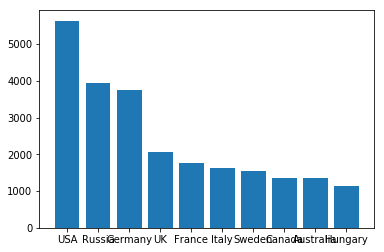

In [50]:
#Bar Chart
plt.bar(top_10_countries.region,top_10_countries.Medals_country)
plt.show()

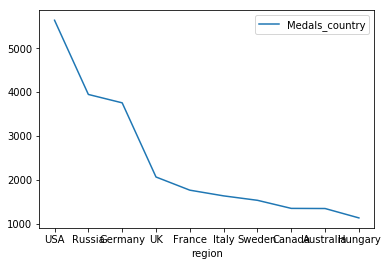

In [51]:
N=10
ind=np.arange(10)
top_10_countries.plot(x='region',y='Medals_country',legend=True)
plt.xticks(ind,('USA', 'Russia', 'Germany', 'UK', 'France', 'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary'))
plt.legend()
plt.show()

In [52]:
country_medals.head()
    

,region,Medal,Medals_country
303,USA,Gold,2638
304,USA,Silver,1641
242,Russia,Gold,1599
302,USA,Bronze,1358
105,Germany,Gold,1301


In [53]:
list=[]
for i in top_10_countries.region:
    list.append(i)

In [54]:
list

['USA',
 'Russia',
 'Germany',
 'UK',
 'France',
 'Italy',
 'Sweden',
 'Canada',
 'Australia',
 'Hungary']

In [55]:
df10=pd.DataFrame()
for i in list:
    dn1=country_medals[country_medals.region==i]
    df10=df10.append(dn1)



In [56]:
type(country_medals)

pandas.core.frame.DataFrame

In [57]:
type(df10)

pandas.core.frame.DataFrame

In [58]:
len(df10)

30

In [59]:
#Country with highest number of Gold Medals
High_Gold=df10[df10.Medal=='Gold'].max()
print(High_Gold)

region             USA
Medal             Gold
Medals_country    2638
dtype: object


In [60]:
#Country with highest number of Silver Medals
High_Silver=df10[df10.Medal=='Silver'].max()
print(High_Silver)

region               USA
Medal             Silver
Medals_country      1641
dtype: object


In [61]:
#Country with highest number of Bronze Medals
High_Bronze=df10[df10.Medal=='Bronze'].max()
print(High_Bronze)

region               USA
Medal             Bronze
Medals_country      1358
dtype: object


In [62]:
df10.head()

,region,Medal,Medals_country
303,USA,Gold,2638
304,USA,Silver,1641
302,USA,Bronze,1358
242,Russia,Gold,1599
241,Russia,Bronze,1178


In [63]:
Medals_country=df10.pivot(index='region',columns='Medal',values='Medals_country')

Medals_country.head(2)

Medal,Bronze,Gold,Silver
region,,,
Australia,522,368,459
Canada,451,463,438


In [64]:

Medals_country.head(2)

Medal,Bronze,Gold,Silver
region,,,
Australia,522,368,459
Canada,451,463,438


In [65]:
Medals_country.index = np.arange(1, len(Medals_country)+1)


In [66]:
Medals_country.dtypes
df10.dtypes

region            object
Medal             object
Medals_country     int64
dtype: object

In [67]:
Medals_country.sort_values('Gold',inplace=True,ascending=False)

In [68]:
Medals_country.head()

Medal,Bronze,Gold,Silver
10,1358,2638,1641
7,1178,1599,1170
4,1260,1301,1195
9,651,677,739
6,531,575,531


In [69]:
df10.dtypes

region            object
Medal             object
Medals_country     int64
dtype: object

In [70]:
Medals_country['region1']= Medals_country.index

In [71]:
Medals_country.head()

Medal,Bronze,Gold,Silver,region1
10,1358,2638,1641,10
7,1178,1599,1170,7
4,1260,1301,1195,4
9,651,677,739,9
6,531,575,531,6


In [72]:
df10['Medal']=df10['Medal'].astype(str)
df10['region']=df10['region'].astype(str)

In [73]:
#list1=[]
#mylabels=[]
#for medal in df10.region.cat.categories:
 #   list1.append(df10[df10.region==medal].Medals_country)
  #  mylabels.append(medal)
    
#h=plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylabels)
#plt.legend()
#plt.show()


In [74]:
df10.Medal.cat.categories

AttributeError: Can only use .cat accessor with a 'category' dtype

In [ ]:
p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

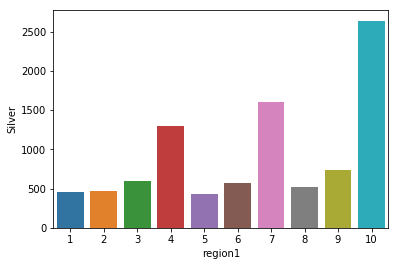

In [75]:
sns.barplot(x='region1',y='Gold',data=Medals_country)
sns.barplot(x='region1',y='Silver',data=Medals_country)

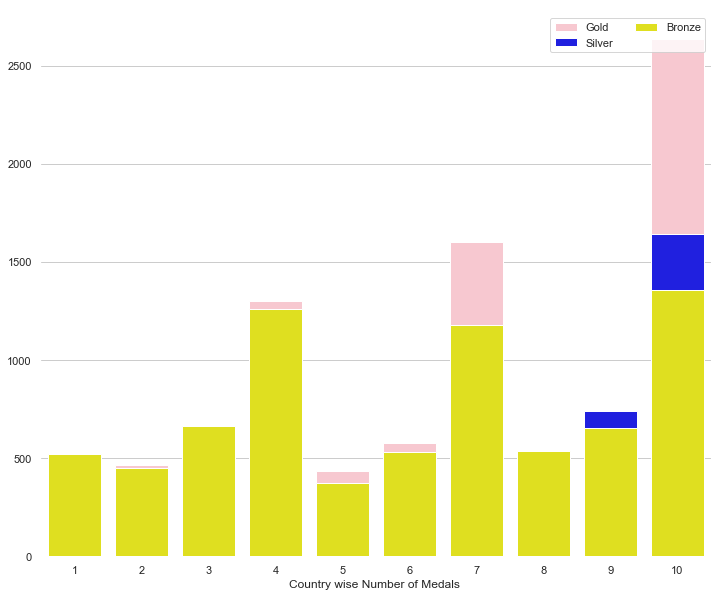

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
#sns.set_color_codes("deep")
sns.barplot(x="region1", y="Gold", data=Medals_country,
            label="Gold", color="Pink")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("pastel")
sns.barplot(x="region1", y="Silver", data=Medals_country,
            label="Silver", color="Blue")

#sns.set_color_codes("muted")
sns.barplot(x="region1", y="Bronze", data=Medals_country,
            label="Bronze", color="Yellow")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="",
       xlabel="Country wise Number of Medals ")
sns.despine(left=True, bottom=True)

In [77]:
Gender_medals=

SyntaxError: invalid syntax (<ipython-input-77-6a4ed7f69fdb>, line 1)

In [78]:
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
Athlet_id,,,,,,,,,,,,,,,,
1,4,Edgar Lindenau Aabye,M,34,0,0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
2,15,Arvo Ossian Aaltonen,M,30,0,0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30,0,0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland


In [79]:
data1=data[['Gender','Medal','ID','Name']]

In [80]:
data1.columns

Index(['Gender', 'Medal', 'ID', 'Name'], dtype='object')

In [81]:
gender_percent=data1.groupby(['Gender']).size().reset_index()

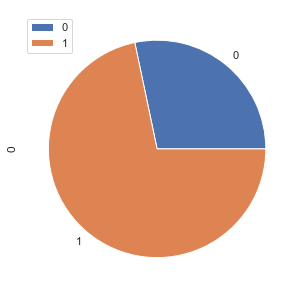

In [82]:
pie_plot=gender_percent.plot.pie(y=0,figsize=(5,5))


In [83]:
data1.groupby(['Gender','Medal']).size()

Gender  Medal 
F       Bronze    3771
        Gold      3747
        Silver    3735
M       Bronze    9524
        Gold      9622
        Silver    9373
dtype: int64

In [84]:
medal_id=data1.groupby(['ID','Medal']).size().reset_index().sort_values(0,ascending=False)

In [85]:
medal_id.head()

,ID,Medal,0
23141,94406,Gold,23
7759,33557,Gold,10
16427,67046,Gold,9
16964,69210,Gold,9
21490,87390,Gold,9


In [86]:
medal_person=data1.groupby(['ID']).size().reset_index().sort_values(0,ascending=False)

In [87]:
medal_person[:10]

,ID,0
19409,94406,28
13805,67046,18
664,4198,15
2194,11951,13
22446,109161,13
18380,89187,13
15390,74420,13
17578,85286,12
6951,35550,12
24808,119922,12


In [88]:
#Athlet with Highest number of medals
first_athlet=data[data.ID==94406]

In [89]:
first_athlet.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
Athlet_id,,,,,,,,,,,,,,,,
19410,94406,"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze,USA


In [90]:
x1=first_athlet.groupby(['Year']).size().reset_index()